In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sys import platform

if platform == "win32":
    path = 'C:/Users/olive/GitHub/f1-analytics/'
elif platform == "darwin":
    path = '~/Documents/GitHub/f1-analytics/'

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 
pd.options.mode.chained_assignment = None  # default='warn'

%matplotlib inline

In [24]:
data = pd.read_csv(path+'data/qualifying.csv')
merged = pd.read_csv(path+'data/merged.csv')

In [25]:
season = data.query('season == 2014')

d = season['final_time'].describe()
print(f"Min: { d['min'] } Max: {d['max']}")

Min: 68.759 Max: 134.438


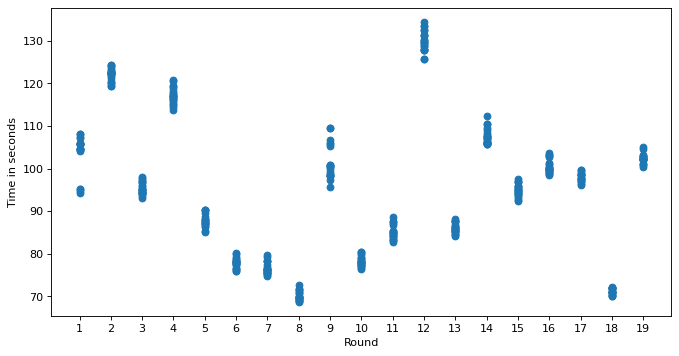

In [26]:
q_times_by_round = season.groupby('round').agg('final_time')

x = season['round'].values
y = season['final_time'].values

fig, axs = plt.subplots(1, dpi=80)
fig.set_size_inches(10, 5)

axs.set_title('')
axs.set_xlabel('Round')
axs.set_ylabel('Time in seconds')
axs.set_xticks(np.unique(x))
axs.scatter(x, y)

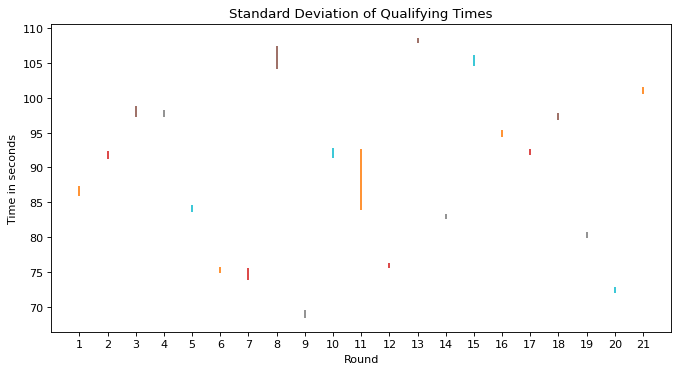

In [33]:
final_time_sd = data.query('season == 2016')

fig, axs = plt.subplots(1, dpi=80)
fig.set_size_inches(10, 5)

axs.set_title('Standard Deviation of Qualifying Times')
axs.set_xlabel('Round')
axs.set_ylabel('Time in seconds')
axs.set_xticks(np.unique(final_time_sd['round']))

for i in range(1, len(np.unique(final_time_sd['round'])) + 1):
    r = final_time_sd.query(
        'round == @i & final_time.notnull()'
        )['final_time'].values
        
    mean = np.mean(r)
    err = 1.96 * np.std(r)/np.sqrt(len(r))

    axs.plot(i, mean)
    axs.errorbar(i, mean, err)

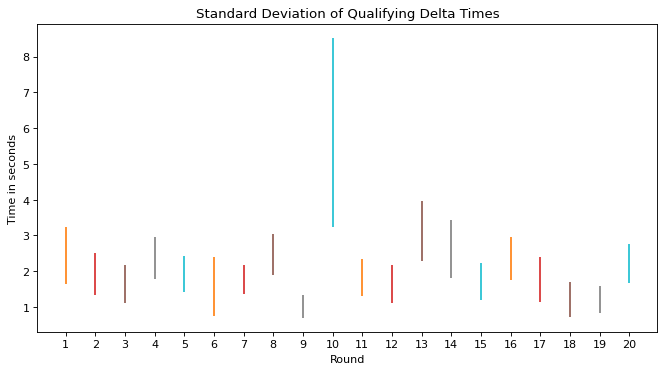

In [41]:
delta_sd = data.query('season == 2017')

fig, axs = plt.subplots(1, dpi=80)
fig.set_size_inches(10, 5)

axs.set_title('Standard Deviation of Qualifying Delta Times')
axs.set_xlabel('Round')
axs.set_ylabel('Time in seconds')
axs.set_xticks(np.unique(delta_sd['round']))

for i in range(1, len(np.unique(delta_sd['round']))+1):
    r = delta_sd.query('round == @i & q_delta.notnull()')['q_delta'].values
    mean = np.mean(r)
    err = 1.96 * np.std(r)/np.sqrt(len(r))

    axs.plot(i, mean)
    axs.errorbar(i, mean, err)

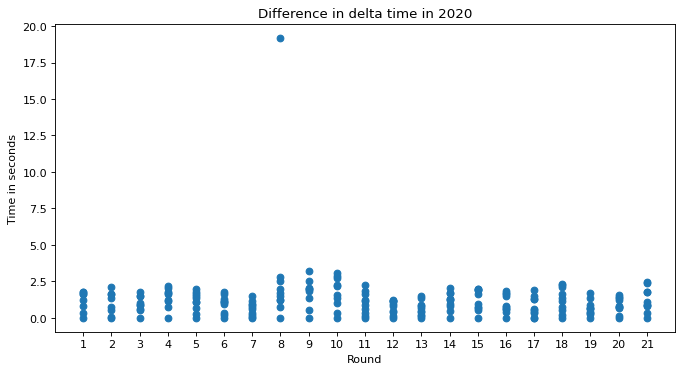

In [43]:
### All rounds in 2020 apart from 14 to show the difference between the front runners
### and the bottom of the pack.
s21 = merged.query('season == 2016 & q_delta.notnull()')

x = s21['round'].values
y = s21['q_delta'].values

fig, axs = plt.subplots(1, dpi=80)
fig.set_size_inches(10, 5)

axs.set_title('Difference in delta time in 2020')
axs.set_xlabel('Round')
axs.set_ylabel('Time in seconds')
axs.set_xticks(np.unique(s21['round']))
axs.scatter(x, y)

In [53]:
### Pole conversion rate

pole_sitters = merged.query('grid == 1')

pole_winners = pole_sitters.query('podium == 1')
pole_conversion = round((len(pole_winners)/ len(pole_sitters)) * 100, 1)
print(f'Pole conversion: {pole_conversion}%')

Pole conversion: 53.8%


In [45]:
### Pole conversion rate

grid_poles = merged.query('grid == 1')
grid_poles['wins'] = grid_poles.podium.apply(lambda x: 1 if x == 1 else 0)
driver_poles = grid_poles.groupby(
    'driver'
    ).agg({
        'wins': 'sum',
        'round': 'size'
    }
).reset_index()
driver_poles
# pole_conversion = round((len(pole_winners)/ len(pole_sitters)) * 100, 1)
# print(f'Pole conversion: {pole_conversion}%')

,driver,wins,round
0,bottas,6,19
1,hamilton,49,72
2,leclerc,2,9
3,massa,0,1
4,max_verstappen,9,11
5,norris,0,1
6,raikkonen,0,2
7,ricciardo,1,3
8,rosberg,13,25
9,stroll,0,1
